In [20]:
# import libraries
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from scipy.stats import gmean, gaussian_kde, norm

In [2]:
# initiate variables
start_date = datetime(2014, 1, 1).date()
end_date = datetime.today().date()
ticker = 'TSM'

tsm_data = yf.download(ticker, start=start_date, end=end_date, interval='1d').dropna()
tsm_data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,17.389999,17.400000,17.110001,17.150000,12.729562,6029100
2014-01-03,17.080000,17.160000,16.920000,16.950001,12.581114,11362700
2014-01-06,16.990000,17.020000,16.860001,16.900000,12.544001,10370200
2014-01-07,16.900000,16.980000,16.830000,16.910000,12.551421,13083100
2014-01-08,17.059999,17.160000,17.049999,17.090000,12.685024,13428900
2014-01-09,16.969999,16.990000,16.660000,16.760000,12.440084,9422200
2014-01-10,16.840000,17.010000,16.820000,16.900000,12.544001,11148000
2014-01-13,17.010000,17.139999,16.900000,16.910000,12.551421,10286100
2014-01-14,17.059999,17.389999,17.040001,17.379999,12.900279,13334500


In [3]:
# plotting time series
def plot_time_series(xdata: list, ydata: list, labels: list, title: str, xlabel='Date', ylabel='Price ($)'):
    plt.figure(figsize=(10, 6))
    for i, d in enumerate(ydata):
        plt.plot(xdata, d, label=labels[i])
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

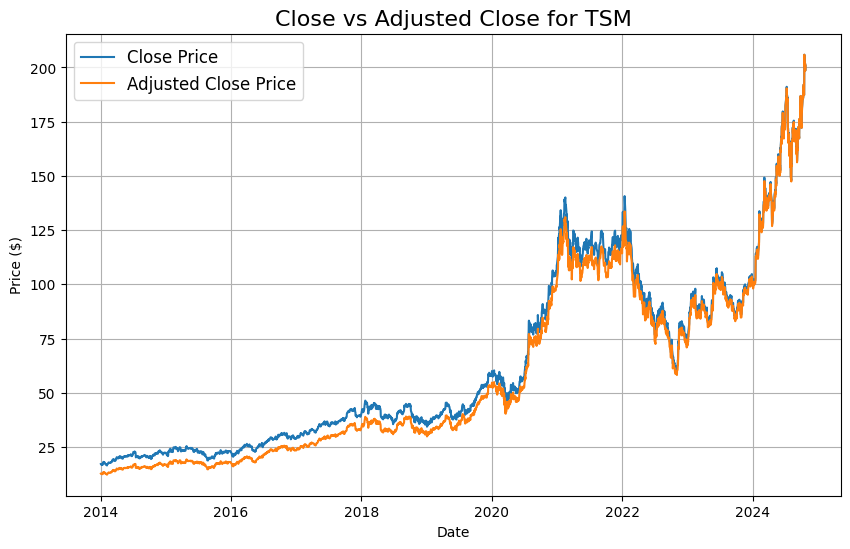

In [4]:
# plotting returns and adjusted returns
xdata = tsm_data.index
ydata = [tsm_data['Close'], tsm_data['Adj Close']]
labels = ['Close Price', 'Adjusted Close Price']
title = f'Close vs Adjusted Close for {ticker}'

plot_time_series(xdata, ydata, labels, title)

In [5]:
tsm_data['Returns'] = tsm_data['Adj Close'].pct_change()
tsm_data['Log Returns'] = np.log(1 + tsm_data['Returns'])
tsm_data = tsm_data.dropna()

tsm_data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Returns,Log Returns
Date,,,,,,,,
2014-01-03,17.080000,17.160000,16.920000,16.950001,12.581114,11362700,-0.011662,-0.011730
2014-01-06,16.990000,17.020000,16.860001,16.900000,12.544001,10370200,-0.002950,-0.002954
2014-01-07,16.900000,16.980000,16.830000,16.910000,12.551421,13083100,0.000592,0.000591
2014-01-08,17.059999,17.160000,17.049999,17.090000,12.685024,13428900,0.010644,0.010588
2014-01-09,16.969999,16.990000,16.660000,16.760000,12.440084,9422200,-0.019309,-0.019498
2014-01-10,16.840000,17.010000,16.820000,16.900000,12.544001,11148000,0.008353,0.008319
2014-01-13,17.010000,17.139999,16.900000,16.910000,12.551421,10286100,0.000592,0.000591
2014-01-14,17.059999,17.389999,17.040001,17.379999,12.900279,13334500,0.027794,0.027415
2014-01-15,17.480000,17.700001,17.430000,17.559999,13.033881,15510900,0.010357,0.010303


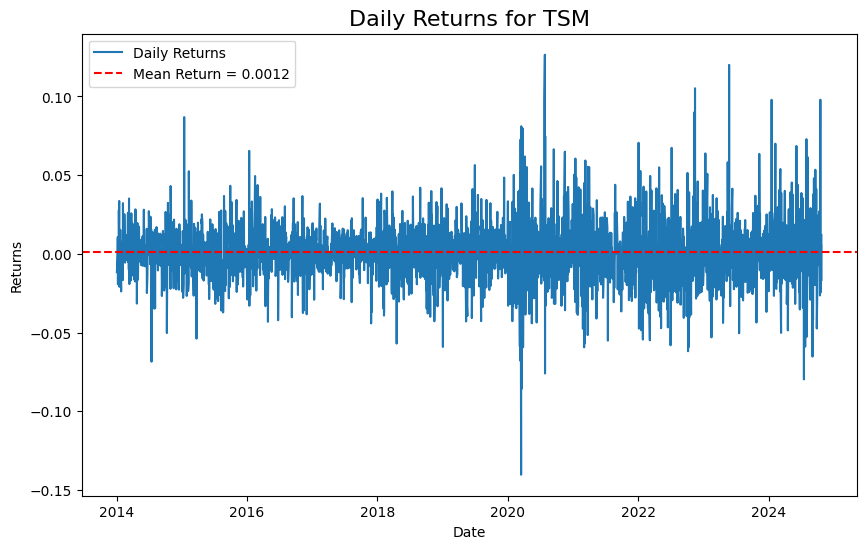

In [11]:
mean_return = np.mean(tsm_data['Returns'])

# plot returns
plt.figure(figsize=(10, 6))
plt.plot(tsm_data['Returns'], label='Daily Returns')
plt.axhline(mean_return, color='r', linestyle='--', label=f'Mean Return = {mean_return:.4f}')

plt.title(f'Daily Returns for {ticker}', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

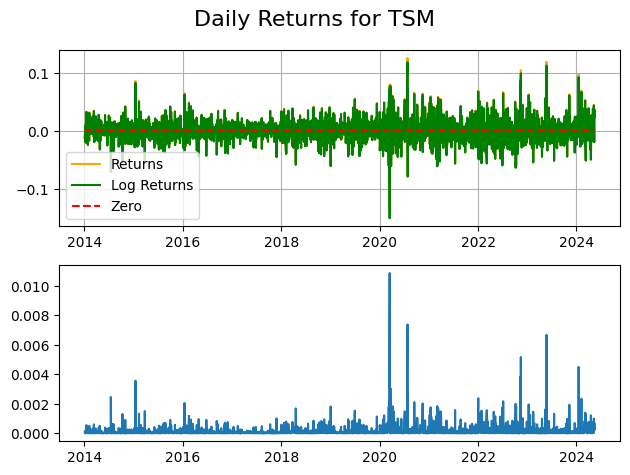

In [7]:
# returns vs log returns
diff = tsm_data['Returns'] - tsm_data['Log Returns']
zero = np.linspace(0, 0, len(tsm_data['Returns']))

figs, axs = plt.subplots(2, 1)

axs[0].plot(tsm_data['Returns'], label='Returns', color='orange')
axs[0].plot(tsm_data['Log Returns'], label='Log Returns', color='green')
axs[0].plot(tsm_data.index, zero, label='Zero', linestyle='--', color='red')
axs[0].legend()
axs[0].grid()


axs[1].plot(diff, label='Difference')

    
figs.suptitle(f'Daily Returns for {ticker}', fontsize=16)
figs.tight_layout()


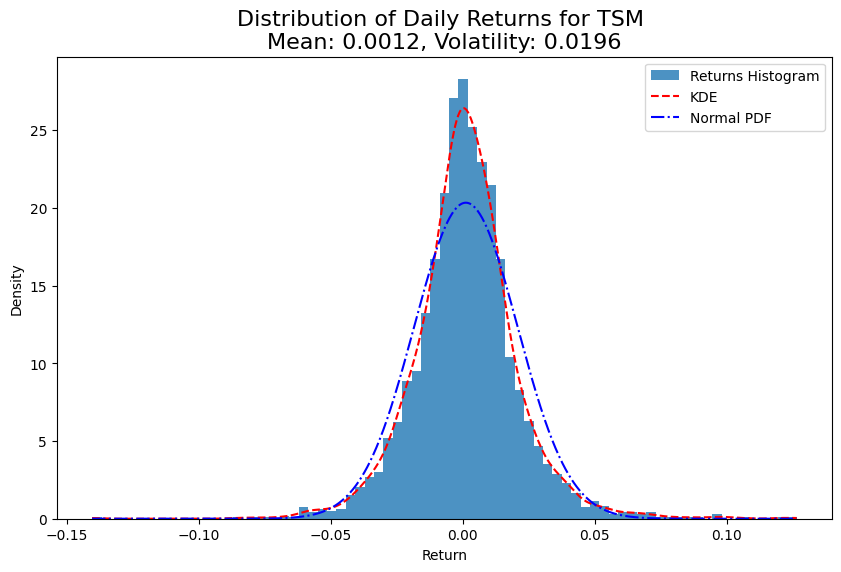

In [27]:
mean = np.mean(tsm_data['Returns'])
std = np.std(tsm_data['Returns'])
kde = gaussian_kde(tsm_data['Returns'])
x = np.linspace(min(tsm_data['Returns']), max(tsm_data['Returns']), 1000)
kde_values = kde(x)
normal = norm.pdf(x, mean, std)

# returns histogram
plt.figure(figsize=(10, 6))
plt.hist(tsm_data['Returns'], bins=75, alpha=0.8, density=True, label='Returns Histogram')
plt.plot(x, kde_values, label='KDE', color='red', linestyle='--')
plt.plot(x, normal, label='Normal PDF', color='blue', linestyle='-.')

plt.title(
    f'Distribution of Daily Returns for {ticker} \n'
    f'Mean: {mean:.4f}, Volatility: {std:.4f}', 
    fontsize=16
)
plt.xlabel('Return')
plt.ylabel('Density')
plt.legend()
plt.show()

In [9]:
tsm_data['Returns'].describe()

count    2609.000000
mean        0.001141
std         0.019193
min        -0.140341
25%        -0.009064
50%         0.000814
75%         0.010857
max         0.126522
Name: Returns, dtype: float64

In [10]:
# calculate average returns using geometric average
def average_returns(returns: pd.Series) -> float:
    return gmean(returns + 1) - 1

# annualized returns
def annualized_returns(returns: float) -> float:
    return (1 + returns)**252 - 1

In [11]:
returns = average_returns(tsm_data['Returns'])
annual = annualized_returns(returns)
print(f'Average daily return for {ticker}: {np.round(returns*100, 4)}%')
print(f'Annualized return for {ticker}: {np.round(annual*100, 4)}%')

Average daily return for TSM: 0.0957%
Annualized return for TSM: 27.2679%


In [12]:
# calculate standard deviation of returns
def std_dev(returns: pd.Series) -> float:
    return np.std(returns)

In [13]:
daily_std = std_dev(tsm_data['Returns'])
annual_std = daily_std * np.sqrt(252)
print(f'daily standard deviation for {ticker}: {np.round(daily_std*100, 4)}%')
print(f'Annual standard deviation for {ticker}: {np.round(annual_std*100, 4)}%')

daily standard deviation for TSM: 1.919%
Annual standard deviation for TSM: 30.4628%


In [14]:
# comparing stocks...
tickers = ['TSM', 'AAPL', 'COKE']
stock_data = yf.download(tickers, start=start_date, end=end_date, interval='1d').dropna()

[*********************100%%**********************]  3 of 3 completed


In [15]:
stock_data.head(10)

Price       Adj Close                            Close                        \
Ticker           AAPL       COKE        TSM       AAPL       COKE        TSM   
Date                                                                           
2014-01-02  17.273230  65.782379  12.816853  19.754642  71.239998  17.150000   
2014-01-03  16.893808  66.724258  12.667386  19.320715  72.260002  16.950001   
2014-01-06  16.985933  66.179428  12.630018  19.426071  71.669998  16.900000   
2014-01-07  16.864449  67.961563  12.637491  19.287144  73.599998  16.910000   
2014-01-08  16.971254  67.148979  12.772015  19.409286  72.720001  17.090000   
2014-01-09  16.754530  67.324448  12.525390  19.161428  72.910004  16.760000   
2014-01-10  16.642731  66.918152  12.630018  19.033571  72.470001  16.900000   
2014-01-13  16.729855  66.188652  12.637491  19.133215  71.680000  16.910000   
2014-01-14  17.062752  66.151718  12.988741  19.513929  71.639999  17.379999   
2014-01-15  17.405325  67.389076  13.123261  19.905714  72.980003  17.559999   

Price            High                              Low                        \
Ticker           AAPL       COKE        TSM       AAPL       COKE        TSM   
Date                                                                           
2014-01-02  19.893929  72.949997  17.400000  19.715000  70.169998  17.110001   
2014-01-03  19.775000  72.680000  17.160000  19.301071  71.389999  16.920000   
2014-01-06  19.528570  72.720001  17.020000  19.057142  71.019997  16.860001   
2014-01-07  19.498571  74.000000  16.980000  19.211430  71.650002  16.830000   
2014-01-08  19.484285  73.900002  17.160000  19.238930  71.790001  17.049999   
2014-01-09  19.530714  73.540001  16.990000  19.119642  71.750000  16.660000   
2014-01-10  19.314285  73.489998  17.010000  18.968214  72.070000  16.820000   
2014-01-13  19.375000  72.860001  17.139999  18.924286  71.040001  16.900000   
2014-01-14  19.526072  72.180000  17.389999  19.202143  71.169998  17.040001   
2014-01-15  20.007143  73.000000  17.700001  19.702143  71.129997  17.430000   

Price            Open                           Volume                   
Ticker           AAPL       COKE        TSM       AAPL   COKE       TSM  
Date                                                                     
2014-01-02  19.845715  72.910004  17.389999  234684800  20300   6029100  
2014-01-03  19.745001  71.389999  17.080000  392467600  14500  11362700  
2014-01-06  19.194643  72.720001  16.990000  412610800  19100  10370200  
2014-01-07  19.440001  71.650002  16.900000  317209200  25200  13083100  
2014-01-08  19.243214  73.459999  17.059999  258529600  26300  13428900  
2014-01-09  19.528570  73.000000  16.969999  279148800  12200   9422200  
2014-01-10  19.279642  73.099998  16.840000  304976000  41400  11148000  
2014-01-13  18.925358  72.410004  17.010000  378492800  34300  10286100  
2014-01-14  19.222143  71.980003  17.059999  332561600  20500  13334500  
2014-01-15  19.768572  71.589996  17.480000  391638800  27100  15510900

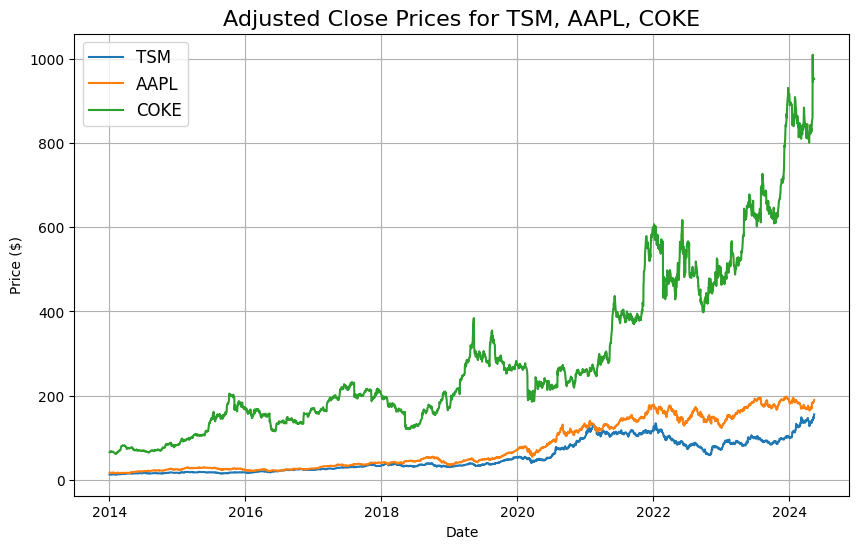

In [16]:
# plotting the adjusted closing prices
plot_time_series(
    stock_data.index, 
    [stock_data['Adj Close'][ticker] for ticker in tickers],
    tickers,
    f'Adjusted Close Prices for {", ".join(tickers)}'
)

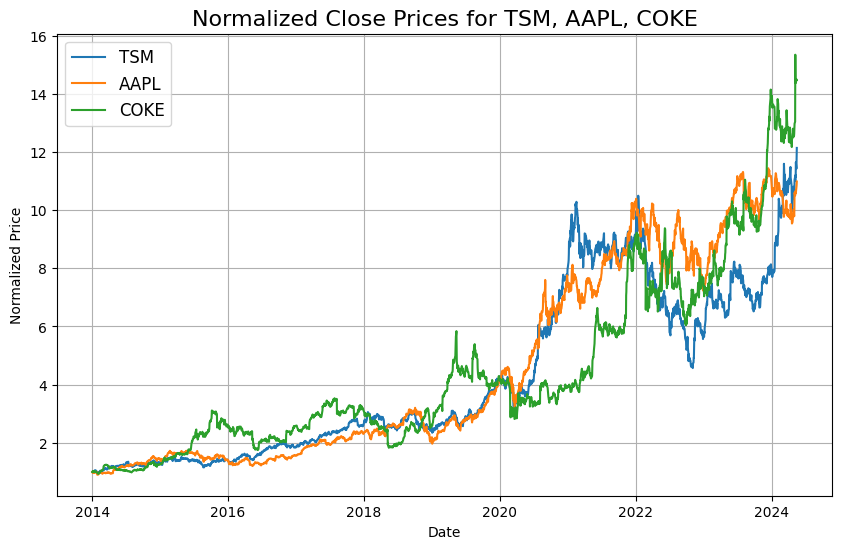

In [17]:
# normalizing the data and replotting
normalized_data = stock_data['Adj Close'] / stock_data['Adj Close'].iloc[0]

plot_time_series(
    stock_data.index,
    [normalized_data[ticker] for ticker in tickers],
    tickers,
    f'Normalized Close Prices for {", ".join(tickers)}',
    ylabel='Normalized Price'
)

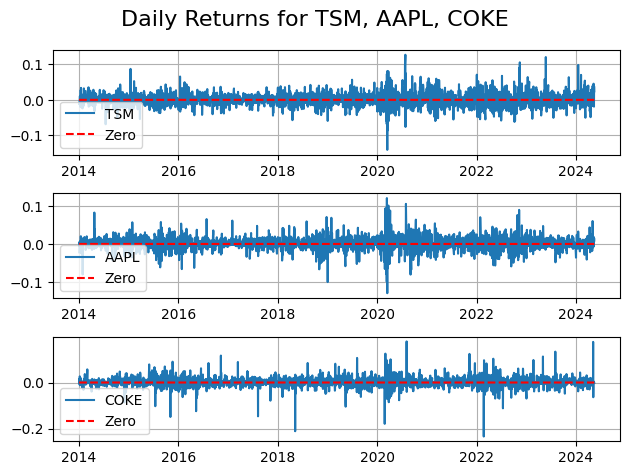

In [18]:
zero = np.linspace(0, 0, len(stock_data['Adj Close'][tickers[0]]))

returns = stock_data['Adj Close'].pct_change()
    
# returns plot
figs, axs = plt.subplots(3, 1)

figs.suptitle(f'Daily Returns for {", ".join(tickers)}', fontsize=16)
for i, ticker in enumerate(tickers):
    axs[i].plot(returns[ticker], label=ticker)
    axs[i].plot(stock_data.index, zero, label='Zero', linestyle='--', color='red')
    axs[i].legend()
    axs[i].grid()
figs.tight_layout()

In [19]:
# calculating average weekly returns, annualized returns, and standard deviation
for i, ticker in enumerate(stock_data['Adj Close']):
    returns = stock_data['Adj Close'][ticker].pct_change().dropna()

    daily_returns = average_returns(returns)
    annual_returns = annualized_returns(daily_returns)
    std = std_dev(returns)
    annual_std = std * np.sqrt(252)
    
    print(f'Average daily return for {ticker}: {np.round(daily_returns*100, 4)}%')
    print(f'Annualized return for {ticker}: {np.round(annual_returns*100, 4)}% \n')
    print(f'Daily standard deviation for {ticker}: {np.round(std*100, 4)}%')
    print(f'Annualized standard deviation for {ticker}: {np.round(annual_std*100, 4)}%\n')
    print('---------------------------------------------\n')

Average daily return for AAPL: 0.0919%
Annualized return for AAPL: 26.0444% 

Daily standard deviation for AAPL: 1.777%
Annualized standard deviation for AAPL: 28.2095%

---------------------------------------------

Average daily return for COKE: 0.1025%
Annualized return for COKE: 29.4419% 

Daily standard deviation for COKE: 2.3206%
Annualized standard deviation for COKE: 36.8384%

---------------------------------------------

Average daily return for TSM: 0.0957%
Annualized return for TSM: 27.2679% 

Daily standard deviation for TSM: 1.919%
Annualized standard deviation for TSM: 30.4628%

---------------------------------------------



In [20]:
# covariance matrix
cov_matrix = stock_data['Adj Close'].pct_change().cov()
print(f'Covariance matrix:\n{cov_matrix}\n')

Covariance matrix:
Ticker      AAPL      COKE       TSM
Ticker                              
AAPL    0.000316  0.000099  0.000174
COKE    0.000099  0.000539  0.000075
TSM     0.000174  0.000075  0.000368



In [21]:
# matrix plot
def matrix_plot(matrix: pd.DataFrame, xticks: list, yticks: list, title: str):
    _, ax = plt.subplots()
    im = ax.imshow(matrix)
    
    ax.set_xticks(np.arange(len(xticks)), xticks)
    ax.set_yticks(np.arange(len(yticks)), yticks)
    ax.set_title(title)
    ax.figure.colorbar(im, ax=ax)
    
    for i in range(len(yticks)):
        for j in range(len(xticks)):
            ax.text(j, i, np.round(matrix.iloc[i, j], 4), ha='center', va='center', color='w')
    
    plt.show()
    
    

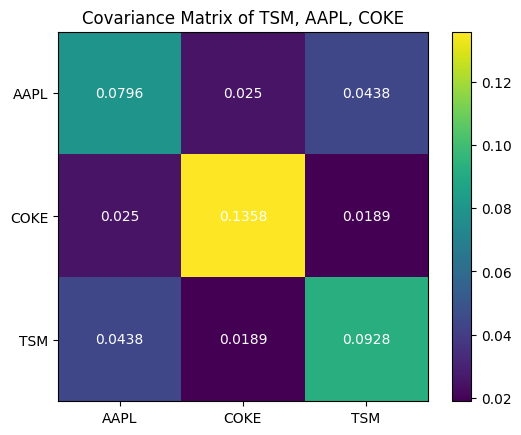

In [22]:
# covariance matrix plot, annualized
matrix_plot(
    cov_matrix*252,
    cov_matrix.columns,
    cov_matrix.columns,
    f'Covariance Matrix of {", ".join(tickers)}'
)

In [23]:
# correlation matrix
corr_matrix = stock_data['Adj Close'].pct_change().corr()
print(f'Correlation matrix:\n{corr_matrix}\n')

Correlation matrix:
Ticker      AAPL      COKE       TSM
Ticker                              
AAPL    1.000000  0.240337  0.509752
COKE    0.240337  1.000000  0.168746
TSM     0.509752  0.168746  1.000000



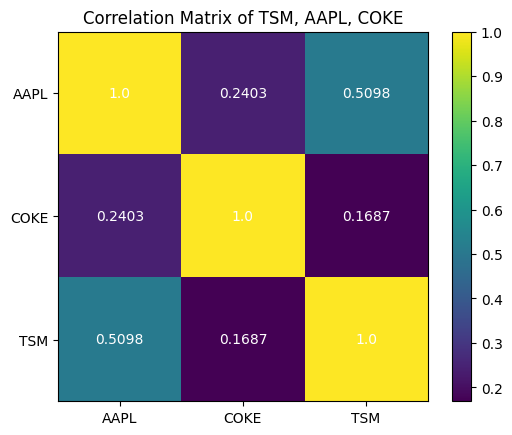

In [24]:
# correlation matrix plot
matrix_plot(
    corr_matrix,
    corr_matrix.columns,
    corr_matrix.columns,
    f'Correlation Matrix of {", ".join(tickers)}'
)